In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('generalized_review_tokens_11_tagged_v3.xlsx',index_col=0)
df['Corrected'] =0
df.head()

,review no,restaurant,sentence no,words,algo_tag,Corrected
0,0,1441 Pizzeria,0,I,O,0
1,0,1441 Pizzeria,0,visited,O,0
2,0,1441 Pizzeria,0,the,O,0
3,0,1441 Pizzeria,0,Fort,O,0
4,0,1441 Pizzeria,0,outlet,O,0


In [3]:
class sentenceGetter(object):
    def __init__(self,df):
        self.data = df
        agg_func = lambda s: [ (w,t,r,rn) for w,t,r,rn in zip(s["words"].tolist(),s["algo_tag"].tolist(),s["restaurant"].tolist(),s["review no"].tolist())]
        self.grouped = self.data.groupby(["review no","sentence no"]).apply(agg_func)
        self.sentences = [sentence for sentence in self.grouped]

In [4]:
df.columns

Index(['review no', 'restaurant', 'sentence no', 'words', 'algo_tag',
       'Corrected'],
      dtype='object')

In [5]:
getter = sentenceGetter(df)
sentences = getter.sentences # get word,entity pair

In [6]:
print(sentences[:2])

[[('I', 'O', '1441 Pizzeria', 0), ('visited', 'O', '1441 Pizzeria', 0), ('the', 'O', '1441 Pizzeria', 0), ('Fort', 'O', '1441 Pizzeria', 0), ('outlet', 'O', '1441 Pizzeria', 0), ('and', 'O', '1441 Pizzeria', 0), ('I', 'O', '1441 Pizzeria', 0), ('wish', 'O', '1441 Pizzeria', 0), ('to', 'O', '1441 Pizzeria', 0), ('keep', 'O', '1441 Pizzeria', 0), ('visitinggg', 'O', '1441 Pizzeria', 0), ('..', 'O', '1441 Pizzeria', 0)], [('I', 'O', '1441 Pizzeria', 0), ('happened', 'O', '1441 Pizzeria', 0), ('to', 'O', '1441 Pizzeria', 0), ('walk', 'O', '1441 Pizzeria', 0), ('into', 'O', '1441 Pizzeria', 0), ('the', 'O', '1441 Pizzeria', 0), ('outlet', 'O', '1441 Pizzeria', 0), ('on', 'O', '1441 Pizzeria', 0), ('a', 'O', '1441 Pizzeria', 0), ('Wednesday', 'O', '1441 Pizzeria', 0), ('and', 'O', '1441 Pizzeria', 0), ('guess', 'O', '1441 Pizzeria', 0), ('what', 'O', '1441 Pizzeria', 0), ('!', 'O', '1441 Pizzeria', 0)]]


In [7]:
reviews = [[str(pair[0]) for pair in sentence] for sentence in sentences]
tags =  [[str(pair[1]) for pair in sentence] for sentence in sentences]
hotels = [list(set([str(pair[2]) for pair in sentence])) for sentence in sentences]
review_no = [list(set([str(pair[3]) for pair in sentence])) for sentence in sentences]

In [8]:
import nltk
from nltk import word_tokenize
from nltk import pos_tag

In [9]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
pos_ =  [pos_tag(review) for review in reviews] 
pos = [[str(pair[1]) for pair in sentence] for sentence in pos_] # get pos

In [11]:
print(reviews[3])
print(tags[3])
print(pos[3])

['I', 'chose', 'the', 'make', 'your', 'own', 'pizza', 'with', 'unlimited', 'toppings', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'E', 'O', 'O', 'E', 'O']
['PRP', 'VBD', 'DT', 'VB', 'PRP$', 'JJ', 'NN', 'IN', 'JJ', 'NNS', '.']


In [12]:
entity_tags =[] # get pos+E 
for i,sequence in enumerate(tags):
    entity_tag =[]
    for j,tag in enumerate(sequence):
        if tag=='E':
            entity_tag.append(sequence[j])
        else:
            entity_tag.append(pos[i][j])
    entity_tags.append(entity_tag)

In [13]:
print(reviews[3])
print(entity_tags[3])

['I', 'chose', 'the', 'make', 'your', 'own', 'pizza', 'with', 'unlimited', 'toppings', '.']
['PRP', 'VBD', 'DT', 'VB', 'PRP$', 'JJ', 'E', 'IN', 'JJ', 'E', '.']


In [23]:
sequences=[] # get word,entity_pos
for sentence,tagseq in zip(reviews,entity_tags):
    sequence =[]
    for word,tag in zip(sentence,tagseq):
        sequence.append((word,tag))
    sequences.append(sequence)

In [15]:
# ids=[]
# e_tags = []
# e_reviews =[]
# for i,(rev,seq) in enumerate(zip(reviews,entity_tags)):
#     if 'E' in seq:
#         e_reviews.append(rev)
#         e_tags.append(seq)
#         ids.append(i)

##### Test

In [16]:
nva = "PHRASE:{(<JJ|JJR|JJS|NN|NNS|NNP|NNPS>?<E>+<CC>)?<JJ|JJR|JJS|NN|NNS|NNP|NNPS>?<E>+<VB|VBP|VBN|VBD><RB>?<JJ|JJR|JJS|NN|NNS|NNP|NNPS>+}"
an = "PHRASE:{<RB>?<JJ|JJR|JJS><E>+}"

In [17]:
from nltk import RegexpParser
parser = RegexpParser(grammar=nva)

In [18]:
test =[('The','DT'),('Burger','E'),('and','CC'),('Pizza','E'),('was','VB'),('very','RB'),('good','JJ')]
test

[('The', 'DT'),
 ('Burger', 'E'),
 ('and', 'CC'),
 ('Pizza', 'E'),
 ('was', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ')]

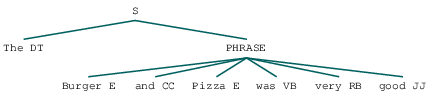

In [19]:
ress =parser.parse(test) ## Need ghostscript to draw tree
ress

#### Only E sents

In [25]:
print(len(sequences))
print(len(hotels))
print(len(reviews))
print(len(entity_tags))
# print(len(e_reviews))
# print(len(e_tags))

7172
7172
7172
7172


In [26]:
parser = RegexpParser(grammar=an) # choose grammar rule
results=[]
for x in sequences:
    results.append(parser.parse(x))
phrases =[]
c=0
for result in results:
    res =[]
    f=0
    for ele in result:
        #print(ele)
        if type(ele)==nltk.tree.Tree:
            #print(list(ele))
            sent= ' '.join([word[0] for word in list(ele)])
            res.append(sent)
            f=1
            c+=1
    if f==0:
        res.append('NULL')
    phrases.append(res)
phrases_an = np.array(phrases)

In [27]:
print("Total Phrases Found",c)

Total Phrases Found 818


In [28]:
print(len(results))

7172


In [29]:
print("Total Phrases Found",c)

Total Phrases Found 818


In [30]:
parser = RegexpParser(grammar=nva) # choose grammar rule
results=[]
for x in sequences:
    results.append(parser.parse(x))
phrases =[]
c=0
for result in results:
    res =[]
    f=0
    for ele in result:
        #print(ele)
        if type(ele)==nltk.tree.Tree:
            #print(list(ele))
            sent= ' '.join([word[0] for word in list(ele)])
            res.append(sent)
            f=1
            c+=1
    if f==0:
        res.append('NULL')
    phrases.append(res)
phrases_nva = np.array(phrases)

In [31]:
print("Total Phrases Found",c)

Total Phrases Found 224


In [32]:
def replace_null(text):
    #print(text[0])
    if text[0]=='NULL':
        return 0
    else: return text

In [33]:
df0 =  pd.DataFrame(review_no,columns=['review no'])
df1 = pd.DataFrame([' '.join(review) for review in reviews],columns=['reviews'])
df2 = pd.DataFrame(hotels,columns=['hotels'])
df3 = pd.DataFrame(phrases_nva,columns=['phrases_nva'])
df4 = pd.DataFrame(phrases_an,columns=['phrases_an'])
final = pd.concat([df0,df1,df2,df3,df4],axis=1)
print(final.shape)
final.head()
final['phrases_nva'] =final.phrases_nva.apply(replace_null)
final['phrases_an'] =final.phrases_an.apply(replace_null)

(7172, 5)


In [34]:
final.head()

,review no,reviews,hotels,phrases_nva,phrases_an
0,0,I visited the Fort outlet and I wish to keep v...,1441 Pizzeria,0,0
1,0,I happened to walk into the outlet on a Wednes...,1441 Pizzeria,0,0
2,0,We were delighted the the BOGO offer .,1441 Pizzeria,0,0
3,0,I chose the make your own pizza with unlimited...,1441 Pizzeria,0,"[own pizza, unlimited toppings]"
4,0,I literary turned into a kid making my pizza .,1441 Pizzeria,0,0


In [35]:
final[(final.phrases_nva!=0) | (final.phrases_an!=0)].shape

(967, 5)

In [36]:
final[(final.phrases_nva!=0) | (final.phrases_an!=0)].groupby('hotels').count()

,review no,reviews,phrases_nva,phrases_an
hotels,,,,
1441 Pizzeria,198,198,198,198
5 Spice,69,69,69,69
Aaswad,108,108,108,108
Amar Juice Centre,57,57,57,57
Cafe Mondegar,57,57,57,57
Delhi Darbar,100,100,100,100
Elco,72,72,72,72
Guru Kripa,91,91,91,91
Pop Tate's,53,53,53,53


In [43]:
final[((final.phrases_nva!=0) | (final.phrases_an!=0)) & (final.hotels=='Elco')]

,review no,reviews,hotels,phrases_nva,phrases_an
4885,701,When I had first pani puri,Elco,0,[first pani puri]
4908,703,"Sev puri looked good but flavor was lacking , ...",Elco,[Sev puri looked good],0
4909,703,Pani puri was tasteless .,Elco,[Pani puri was tasteless],0
4923,705,The food was fantastic and service quick and e...,Elco,[food was fantastic],0
4938,709,The chole bhature were excellent too along wit...,Elco,[chole bhature were excellent],[seasonal fresh fruit milkshakes]
4941,710,"Really rich and sweet , a simple dish but real...",Elco,0,[simple dish]
4960,714,Rapid and good service as we add on more vada ...,Elco,0,[more vada pav]
4971,717,The pani puris were excellent .,Elco,[pani puris were excellent],0
4973,717,The stuffing of moong and boondi was new to us...,Elco,[boondi was new],0
4976,718,The best Pani Puris even now .,Elco,0,[best Pani Puris]


#### Check Polarity

NVA

In [88]:
new =final[final.phrases_nva!=0][['hotels','phrases_nva']].values  ## Take nva phrases
phrases=[[hotel,phrase[0]] for hotel,phrase in new.tolist() ]

In [90]:
sentiment_df = pd.DataFrame(phrases,columns=['hotel','phrase'])
sentiment_df.head()

,hotel,phrase
0,1441 Pizzeria,dough balls are very heavy
1,1441 Pizzeria,Chicken Wings were decent
2,1441 Pizzeria,ball Masala lemonade Krishs
3,1441 Pizzeria,wings were also fresh
4,1441 Pizzeria,bananas / marshmallow


In [92]:
from textblob import TextBlob

In [102]:
blobs = [TextBlob(phrase) for phrase in sentiment_df.phrase.tolist()]

In [104]:
test1 =blobs[0]

In [107]:
test1.sentiment.polarity

-0.26

In [108]:
def polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [109]:
sentiment_df['polarity'] = sentiment_df.phrase.apply(polarity)

In [110]:
sentiment_df

,hotel,phrase,polarity
0,1441 Pizzeria,dough balls are very heavy,-0.260000
1,1441 Pizzeria,Chicken Wings were decent,-0.216667
2,1441 Pizzeria,ball Masala lemonade Krishs,0.000000
3,1441 Pizzeria,wings were also fresh,0.300000
4,1441 Pizzeria,bananas / marshmallow,0.000000
5,1441 Pizzeria,pizza are ridiculously slow,-0.300000
6,1441 Pizzeria,Masala lemonade *,0.000000
7,1441 Pizzeria,pizza was quiet healthy,0.250000
8,1441 Pizzeria,Barbeque and Smoked Chicken Pizza were very good,0.155000
9,1441 Pizzeria,gourmet toppings are insane,-1.000000
